# Linear algebra

Author: Marios Koulakis

**Note:** Throughout the text we assume being in finite dimensional spaces over $\mathbb{R}$ equipped with the Euclidian inner product.

In [1]:
def plot_2D_vector(vector, with_coordinate_projections=True, color='black', lw=1):
    x, y = vector
    
    arrow = plt.arrow(
        0, 0, 
        *vector, 
        head_width=0.05, 
        head_length=0.1, 
        color=color, 
        length_includes_head=True,
        lw=lw)
        
    plt.ylim((
        min(0, min(1.2 * min(vector), plt.ylim()[0])), 
        max(1.2 * max(vector), plt.ylim()[1])
    ))
    plt.xlim((
        min(0, min(1.2 * min(vector), plt.xlim()[0])), 
        max(1.2 * max(vector), plt.xlim()[1])
    ))
    
    if with_coordinate_projections:
        plt.hlines(y, 0, x, linestyles='--', alpha=0.2, color=color)
        plt.vlines(x, 0, y, linestyles='--', alpha=0.2, color=color)
    
    if min(plt.xlim()[0], plt.ylim()[0]) < 0:
        plt.axhline(0, color='black', alpha=0.1)
        plt.axvline(0, color='black', alpha=0.1)
    
    return arrow

In [19]:
def plot_polygon(*args):
    triangle = plt.Polygon(np.array(args))
    plt.gca().add_patch(triangle)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Vectors
Vectors are arrows which encode magnitute and direction of some entity. Their visualization can be very informative, but they are inpractical when it comes to computations. The main tool to work with vectors is their Cartesian coordinate representation.

In terms of programming, they can be represented by arrays of their coordinates, e.g. tuples, lists or numpy arrays.

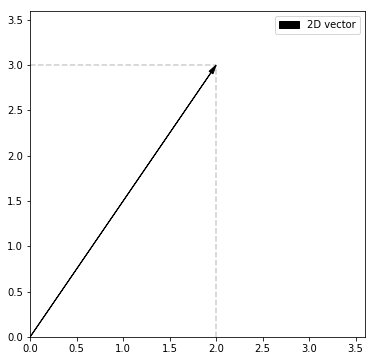

In [3]:
# Example of simple 2-dimensional vector
vector_2d = np.array([2, 3])

# Plot vector
plt.figure(figsize=(6, 6))
vector_arrow = plot_2D_vector(vector_2d)
plt.legend((vector_arrow,), ('2D vector',))
plt.show()

### Main vector operations
To fully define a vector space $V$ and be able to define bases, the following two operations are enough:
- Addition: $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} + \mathbf{u} \in V$
- Scalar multiplication: $(a, \mathbf{u}) \mapsto a\ \mathbf{v} \in V$

for $\mathbf{v}, \mathbf{u} \in \mathbf{V}$ and $a \in \mathbb{R}$

If we equip $V$ with an inner product operation, then we can also define angles between vectors and lenghts. As a result of that, we can define orthonormal bases.  
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} \cdot \mathbf{u} \in \mathbb{R}$

For more information and the axioms assigned to the above operations look [here for vector spaces](https://en.wikipedia.org/wiki/Vector_space#Definition) and [here for inner products](https://en.wikipedia.org/wiki/Inner_product_space#Definition).

#### Addition
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} + \mathbf{u}$
- Coordinate definition: $(x_1, x_2) + (x_1', x_2') = (x_1 + x_1', x_2 + x_2')$
- Returns the combined effect of two vectors

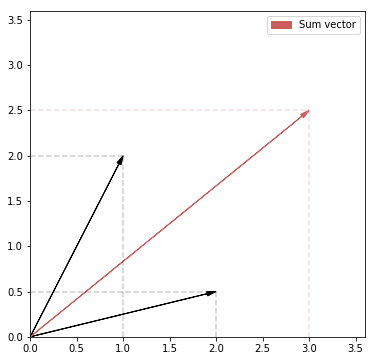

In [4]:
# Sum of two vectors
vector_1 = np.array([1, 2])
vector_2 = np.array([2, 0.5])

sum_vector = vector_1 + vector_2

# Plot vectors
plt.figure(figsize=(6, 6))
plot_2D_vector(vector_1)
plot_2D_vector(vector_2)
sum_v_arr = plot_2D_vector(sum_vector, color='indianred')
plt.legend((sum_v_arr,), ('Sum vector',))
plt.show()

#### Scalar multiplication
- $(a, \mathbf{u}) \mapsto a\ \mathbf{v}$
- Coordinate definition: $a \ (x_1, x_2) = (a\ x_1 + a\ x_2)$
- Multiplies the effect of a vector with a real number $a$

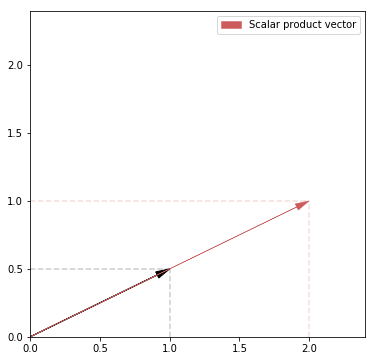

In [5]:
# Scalar multiplication of vector
vector = np.array([1, 0.5])
a = 2

scalar_product_vector = a * vector

# Plot vectors
plt.figure(figsize=(6, 6))
plot_2D_vector(vector)
sum_v_arr = plot_2D_vector(scalar_product_vector, color='indianred', lw=0.5)
plt.legend((sum_v_arr,), ('Scalar product vector',))
plt.show()

#### Dot product
- $(\mathbf{v}, \mathbf{u}) \mapsto \mathbf{v} \cdot \mathbf{u}$
- Coordinate definition: $(x_1, x_2) \cdot (x_1', x_2') = x_1 x_1' + x_2 x_2'$
- Multiplies the effects of the vectors relative to their angle.
- Two vectors $\mathbf{v}, \mathbf{u}$ are called orthogonal iff $\mathbf{v} \cdot \mathbf{u} = 0$.

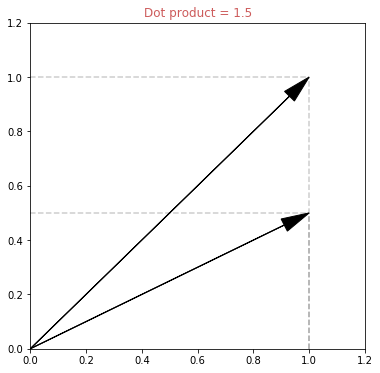

In [6]:
# Dot product of two vectors
vector_1 = np.array([1, 0.5])
vector_2 = np.array([1, 1])

dot_product = (vector_1 * vector_2).sum()
# or using numpy's built-in functions:
# dot_product_vector = np.dot(vector_1, vector_2)

# Plot vectors
plt.figure(figsize=(6, 6))
plt.title('Dot product = {}'.format(dot_product), color='indianred')
plot_2D_vector(vector_1)
vec_2 = plot_2D_vector(vector_2)
plt.show()

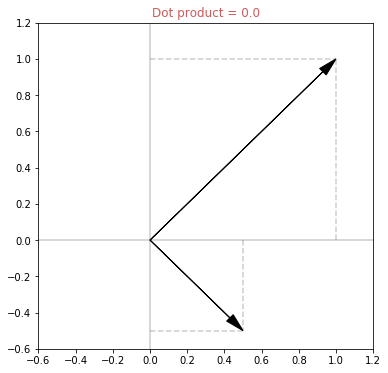

In [7]:
# Orthogonal vectors
vector_1 = np.array([0.5, -0.5])
vector_2 = np.array([1, 1])

dot_product = np.dot(vector_1, vector_2)

# Plot vectors
plt.figure(figsize=(6, 6))
plt.title('Dot product = {}'.format(dot_product), color='indianred')
plot_2D_vector(vector_1)
vec_2 = plot_2D_vector(vector_2)
plt.show()

### Orthonormal bases
Any basis such that all pairs of vectors are orthogonal and of length 1. The array representations of vectors used above assumed the existence of such a basis $\{\mathbf{e_1}, \mathbf{e_2}\}$ on the $x$ and $y$ axis. Thanks to operation of addition and scalar multiplication every vectory $v$ can be re-written as $a_1 \mathbf{e_1} + a_2 \mathbf{e_2}$ or equivalently $(a_1, a_2)$.

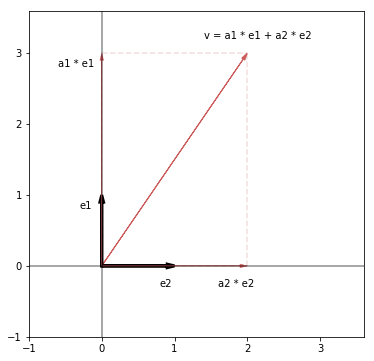

In [8]:
# The projections of the first vector we saw to e1 and e2
vector_2d = np.array([2, 3])
a1 = vector_2d[0]
a2 = vector_2d[1]

# the orthonormal basis
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Plot vectors
plt.figure(figsize=(6, 6))
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plot_2D_vector(vector_2d, color='indianred')
e1_arr = plot_2D_vector(e1, lw=3)
e2_arr = plot_2D_vector(e2, lw=3)
plot_2D_vector(a1 * e1, color='indianred', lw=0.5)
plot_2D_vector(a2 * e2, color='indianred', lw=0.5)
plt.annotate('e1', xy=(-.3, .8))
plt.annotate('e2', xy=(.8, -.3))
plt.annotate('a1 * e1', xy=(-.6, 2.8))
plt.annotate('a2 * e2', xy=(1.6, -.3))
plt.annotate('v = a1 * e1 + a2 * e2', xy=(1.4, 3.2))
plt.show()

## 2. Linear transformations and matrices

### Linear transformations
A linear transformation is a function $f: V \rightarrow U$ from a linear space $V$ to a linear space $U$ which preserves the linear space structure i.e.:
- $f(\mathbf{v} + \mathbf{u}) = f(\mathbf{v}) + f(\mathbf{u})$
- $f(a\ \mathbf{v}) = a\ f(\mathbf{v})$

for every $\mathbf{v} \in V$ and $a \in \mathbb{R}$.

### From linear trasformations to matrices
We mentioned before that the main tool in linear spaces is the Cartesian coordinates representation of vectors. Actually in every coding example the vectors made sense only through those representations!

It makes sense to look for a similar representation for the linear embeddings. To do that we have to study what happens when we map the vectors from an orthonormal base of $V$ to an orthonormal base of $U$.

For simplicity let's assume that 
- $V = U = \mathbb{R}^2$ 
- $\mathbf{e_1} = (1, 0), \mathbf{e_2} = (0, 1)$
- $f: V \rightarrow U$ is a linear transform

Then there are vectors $\mathbf{u_1}, \mathbf{u_2} \in U$ such that 
- $f(\mathbf{e_1}) = \mathbf{u_1}$
- $f(\mathbf{e_2}) = \mathbf{u_2}$

If we expand $\mathbf{u_1}, \mathbf{u_2}$ with their basis representations we get 
- $\mathbf{u_1} = a_{11} \mathbf{e_1} + a_{12} \mathbf{e_2}$ and $\mathbf{u_1} = a_{21} \mathbf{e_1} + a_{22} \mathbf{e_2}$ 

for some coordinates $a_{11}, a_{12}, a_{21}, a_{22} \in \mathbb{R}$.

This means that:
- $f(\mathbf{e_1}) = a_{11} \mathbf{e_1} + a_{12} \mathbf{e_2}$
- $f(\mathbf{e_2}) = a_{21} \mathbf{e_1} + a_{22} \mathbf{e_2}$

Provided that any vector can be represented on the basis $\mathbf{e_1}, \mathbf{e_2}$ with its coordinates, the information in $a_{11}, a_{12}, a_{21}, a_{22}$ is enough to describe the linear transform $f$. Because those coefficients are assigned per element of the basis, we add another dimension in the notation of the representation and get a matrix:

$A = \begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}$

Now given any $\mathbf{v} \in V$ and its representation $x_1 \mathbf{e_1} + x_2 \mathbf{e_2}$, we can compute its image:

$\begin{align*} 
f(\mathbf{v}) & = f(x_1 \mathbf{e_1} + x_2 \mathbf{e_2})\\ 
& = x_1 f(\mathbf{e_1}) + x_2 f(\mathbf{e_2})\\
& = x_1 a_{11} \mathbf{e_1} + x_1 a_{12} \mathbf{e_2} + x_2 a_{21} \mathbf{e_1} + x_2 a_{22} \mathbf{e_2}\\
& = (x_1 a_{11} + x_2 a_{21})\ \mathbf{e_1} + (x_1 a_{12} + x_2 a_{22})\ \mathbf{e_2}
\end{align*}$

If we go on and define the multiplication of a matrix with an array as:

$\begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2 
\end{bmatrix}
=
\begin{bmatrix}
    x_1 a_{11} + x_2 a_{21}\\
    x_1 a_{12} + x_2 a_{22} 
\end{bmatrix}$

then we finally have a useful way of computing $f$:

$f: (x_1, x_2) \mapsto 
\begin{bmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2
\end{bmatrix}$

or, in short,

$f: \mathbf{v} \mapsto A \mathbf{v}$

### Some common linear transformations
We first focus on linear transformations $f: \mathbb{R} \mapsto \mathbb{R}$ which preserve dimensionality. To illustrate the transforms, we fix three vectors and the triangle they form and observe how those objects look like after applying the transformation.  

#### Fixed vectors

In [45]:
def plot_vectors_and_polygon(vectors, colors):
    for vector, color in zip(vectors, colors):
        plot_2D_vector(vector, color=color)

    plot_polygon(*vectors)

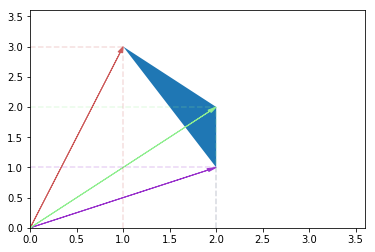

In [47]:
vectors = [np.array([1, 3]), np.array([2, 1]), np.array([2, 2])]
colors = ['indianred', 'darkorchid', 'lightgreen']

plot_vectors_and_polygon(vectors, colors)
plt.show()

#### Scaling by constant $a$
$\begin{bmatrix}
    a & 0\\
    0 & a
\end{bmatrix}$

where $a \in \mathbb{R}$.

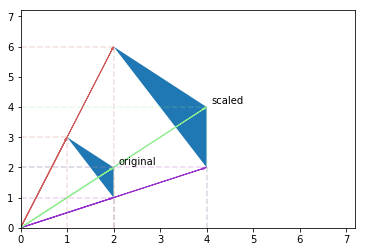

In [80]:
# a = 2
a = 2

scaling = np.array([
    [a, 0],
    [0, a]
])

transformed_vectors = [np.matmul(scaling, vector) for vector in vectors]


plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [.1, .1])

plot_vectors_and_polygon(transformed_vectors, colors)
plt.annotate('scaled', xy=transformed_vectors[2] + [.1, .1])

plt.show()

#### Rotation counter-clockwise by angle
$\begin{bmatrix}
    \cos\theta & -\sin\theta\\
    \sin\theta & \cos\theta
\end{bmatrix}$

where $\theta \in [0, 2\pi)$.

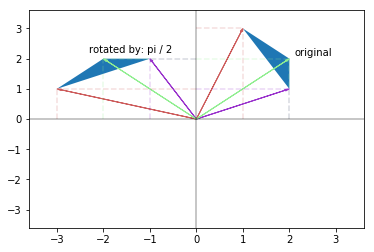

In [81]:
# theta = pi / 2
theta = np.pi / 2

rotation_matrix = np.array([
    [np.cos(theta), - np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

transformed_vectors = [np.matmul(rotation_matrix, vector) for vector in vectors]

plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [.1, .1])

plot_vectors_and_polygon(transformed_vectors, colors)
plt.annotate('rotated by: pi / 2', xy=transformed_vectors[2] + [-.3, .2])

plt.show()

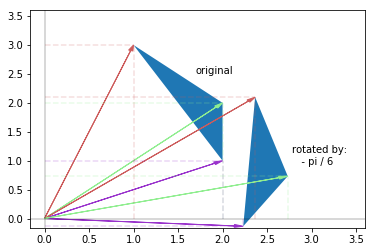

In [85]:
# theta = - pi / 6
theta = - np.pi / 6

rotation_matrix = np.array([
    [np.cos(theta), - np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

transformed_vectors = [np.matmul(rotation_matrix, vector) for vector in vectors]

plot_vectors_and_polygon(vectors, colors)
plt.annotate('original', xy=vectors[2] + [-.3, .5])

plot_vectors_and_polygon(transformed_vectors, colors)
plt.annotate('rotated by:\n   - pi / 6', xy=transformed_vectors[2] + [.05, .2])

plt.show()

### Linear transformations compressing dimensionality

### Linear transformations embedding into higher dimensionality

## Popular operations on transformations (in other words, transformations of transformations)

### Inverse transformation

### Transpose transformation

### Composition of transformations

## <div style='color:steelblue'>Application 1: Linear regression</div>

## Decompositions of transformations / matrices

## <div style='color:steelblue'>Application 2: PCA</div>

## <div style='color:steelblue'>Application 3: SVD</div>